In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA as sklearnPCA

In [2]:
#data import as pandas data frame
df=pd.read_csv('job-market.csv')

<AxesSubplot:xlabel='count', ylabel='Location'>

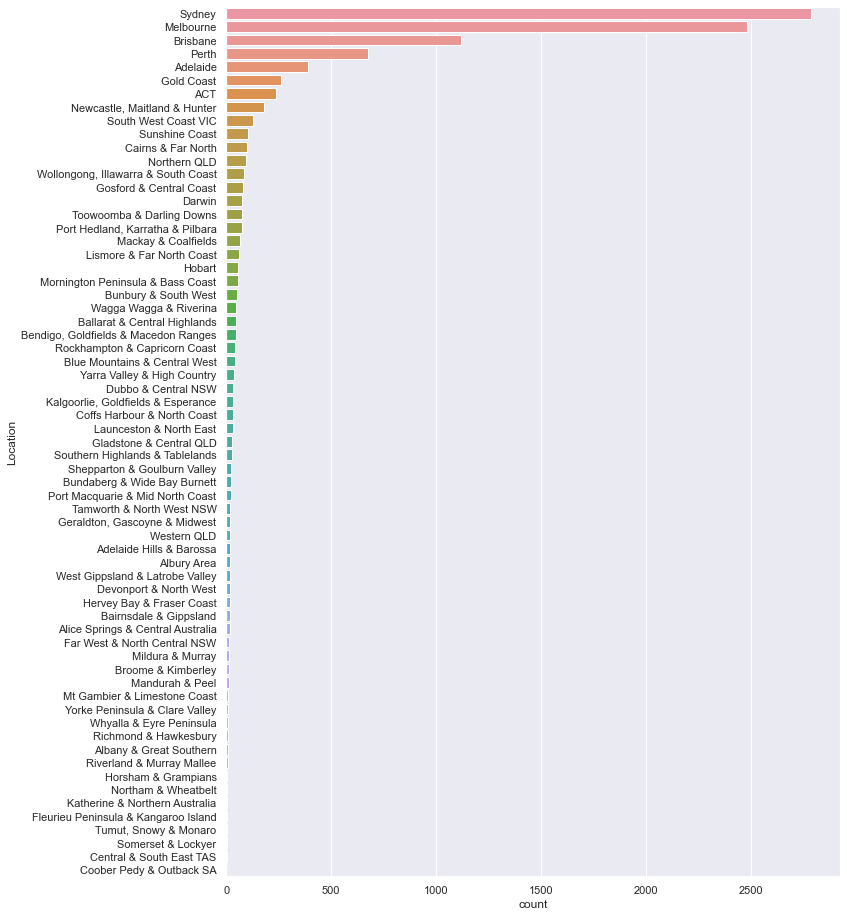

In [3]:
#Job by location 
sns.set(rc={'figure.figsize':(11,16)})#setting the figure size
sns.countplot(y='Location',data=df,order = df['Location'].value_counts().index)

In [7]:
# function to add highest salary and lowest salary into one string
def add(x,y):
    return(str(x)+"-"+str(y))

In [8]:
#adding new column to data frame to get salary range of job posts
df['question2']=df.apply(lambda row : add(row['LowestSalary'], row['HighestSalary']), axis = 1)

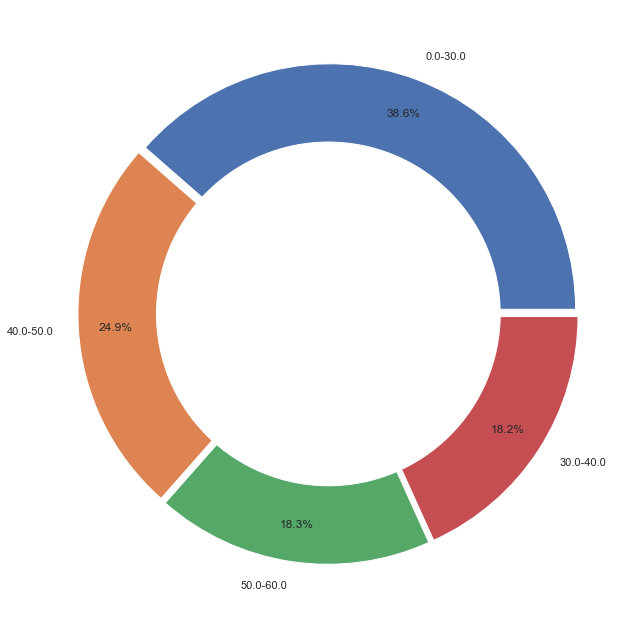

In [9]:
#Plotting Donut Chart
#plotting pie chart using matplotlin and adding a white circle in between
plt.pie(df['question2'].value_counts()[1:], labels=df['question2'].value_counts().index[1:],
        autopct='%1.1f%%', pctdistance=0.85,explode=[0.02,0.02,0.02,0.02])
# Adding Circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [10]:
#WINE DATASET

In [11]:
df1=pd.read_csv("wine.data.csv")

In [12]:
df1.head()

Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735

In [13]:
#saving "Label" column in Label variable
Label=df1["Label"]
df1 = df1.drop('Label', 1)

/var/folders/n7/mxvwd0jj5nv2jlky3hbjxff80000gn/T/ipykernel_81165/3332915813.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1 = df1.drop('Label', 1)


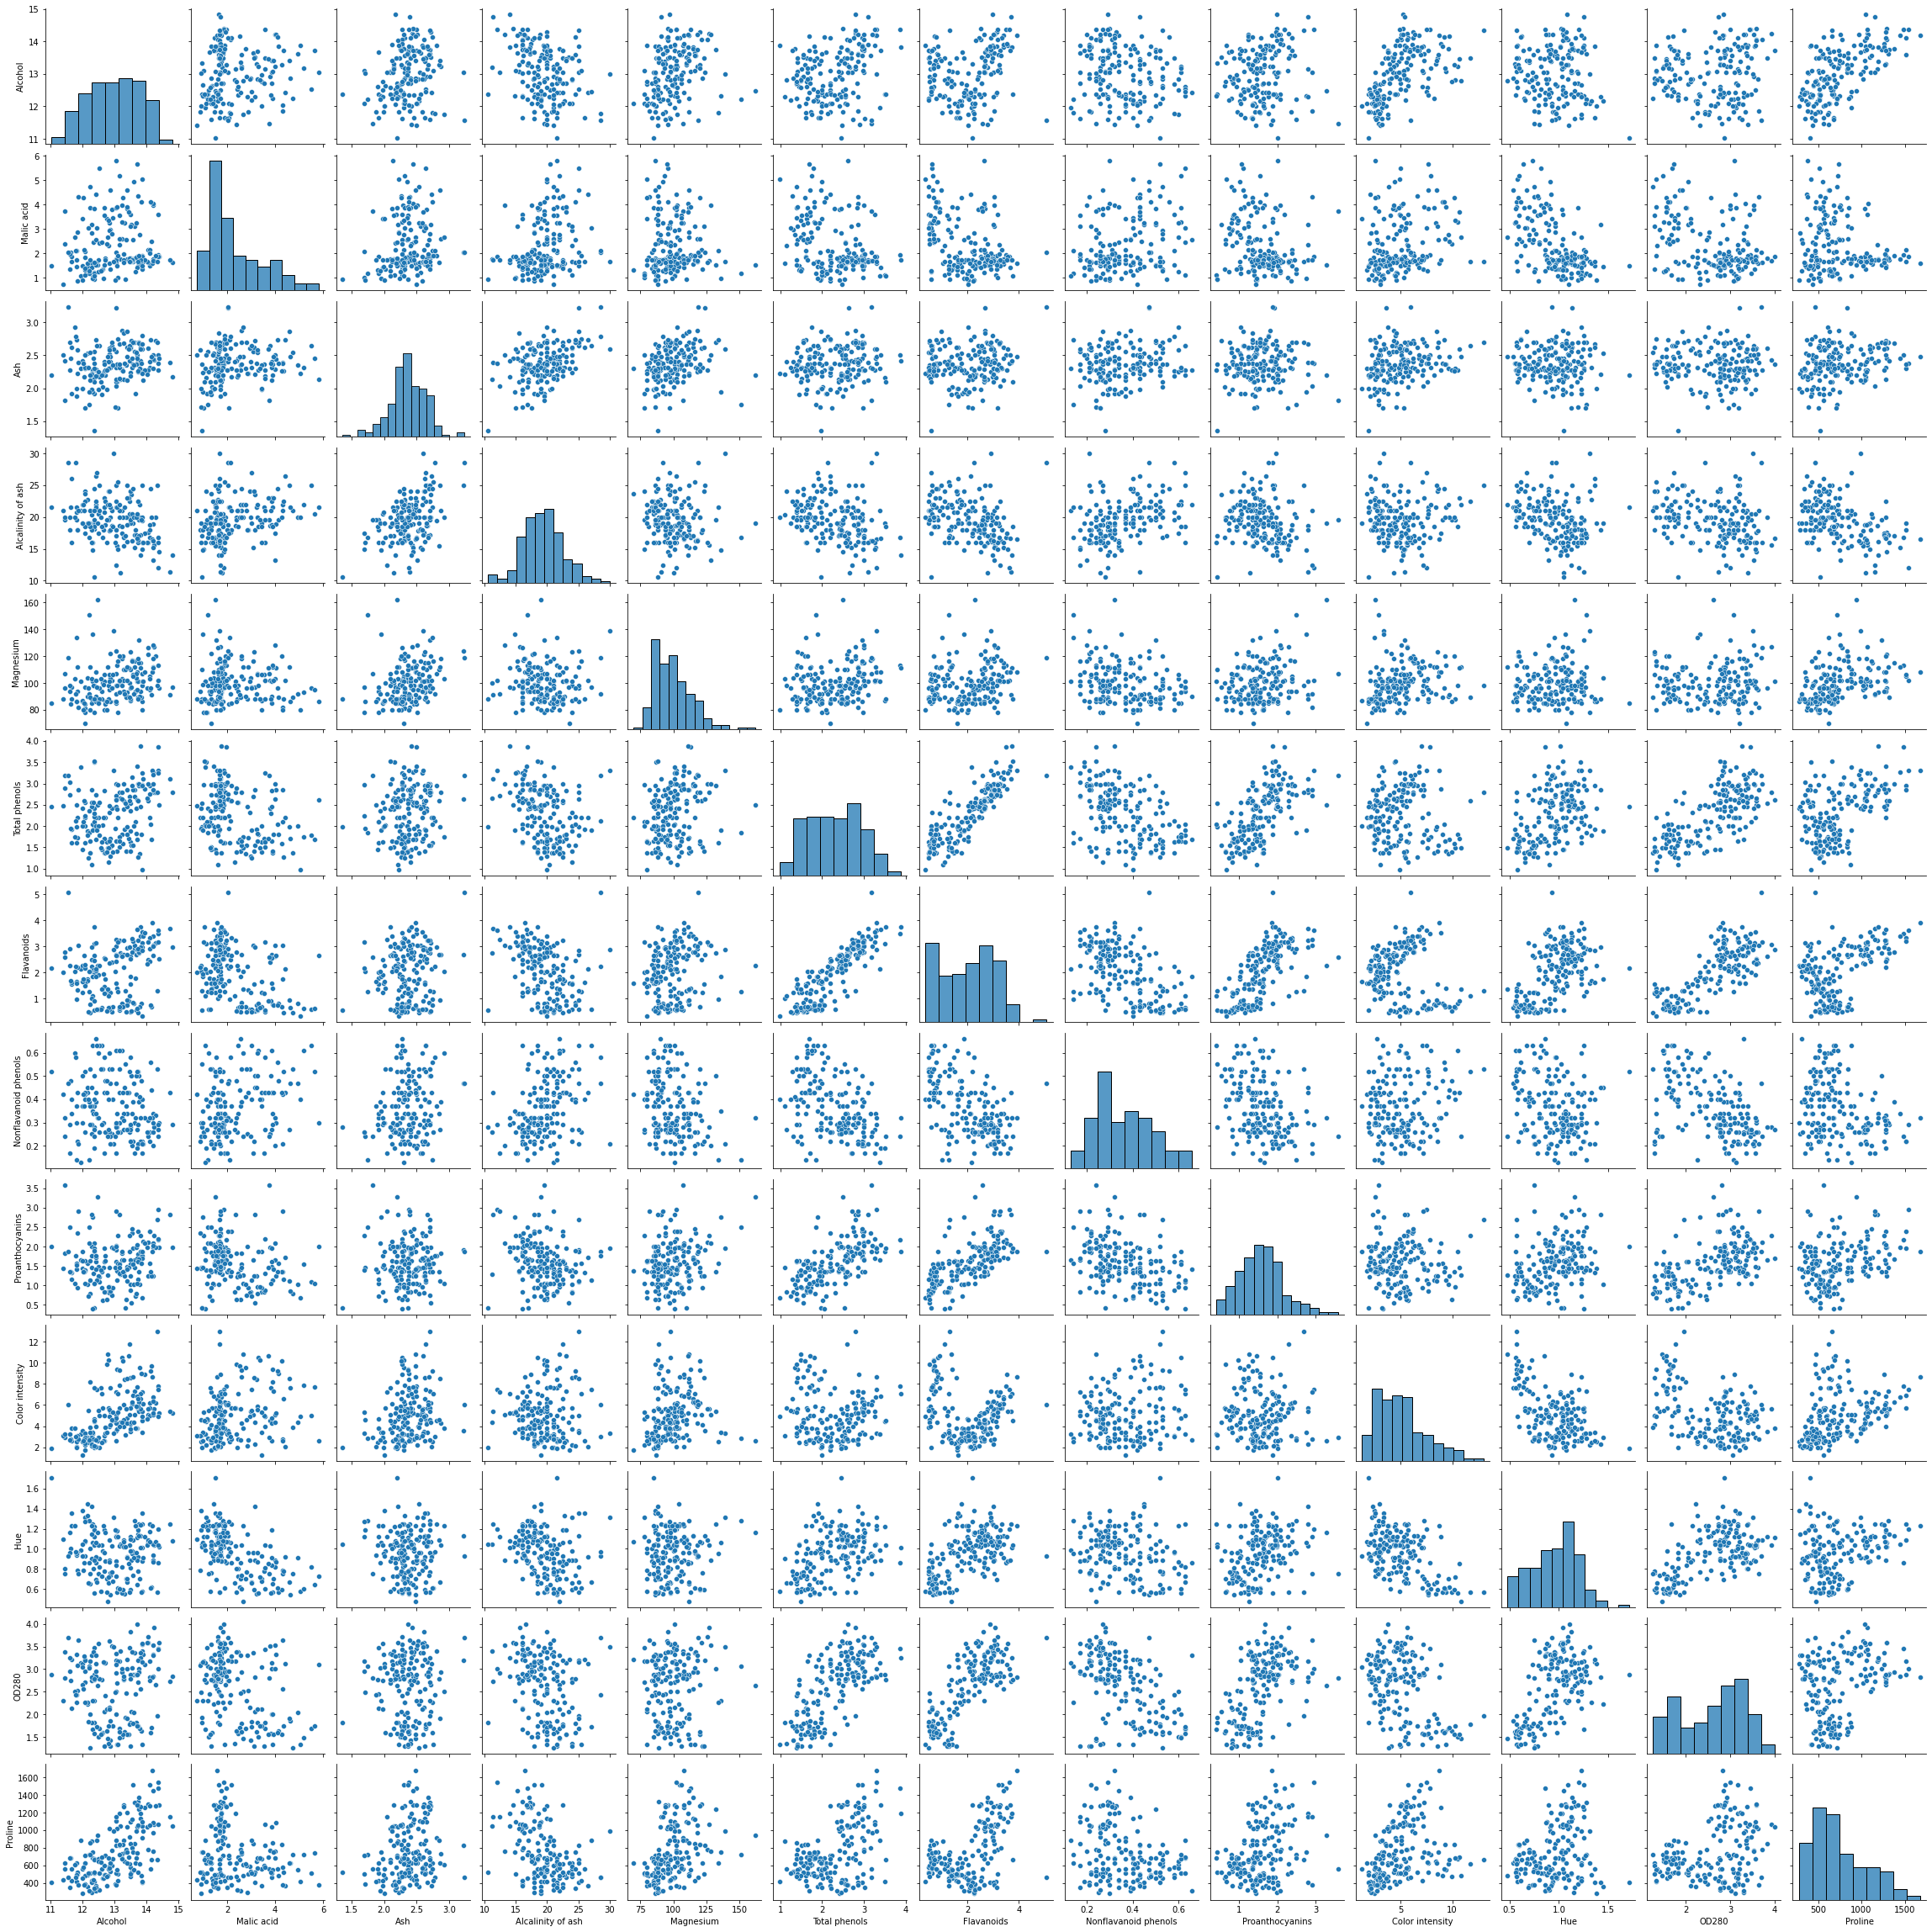

In [16]:
#using scatter plot to learn attributes
sns.pairplot(df1)

In [14]:
#plotting correlation matrix
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

In [19]:
#Largest contribution
#Top three correlated pair of attributes are Flavanoids-Total phenols, Flavanoids-OD280,Total phenols-OD280

In [60]:
#kmeans
from sklearn.cluster import KMeans

In [61]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
#num clusters =3 as there are three types of labels

In [62]:
#normalizing the data
X_norm = (df1 - df1.min()) / (df1.max()-df1.min())#normalized data

In [63]:
pred = kMeansClustering.fit_predict(X_norm)

In [64]:
X_norm["cluster"] = pred.astype('float64')

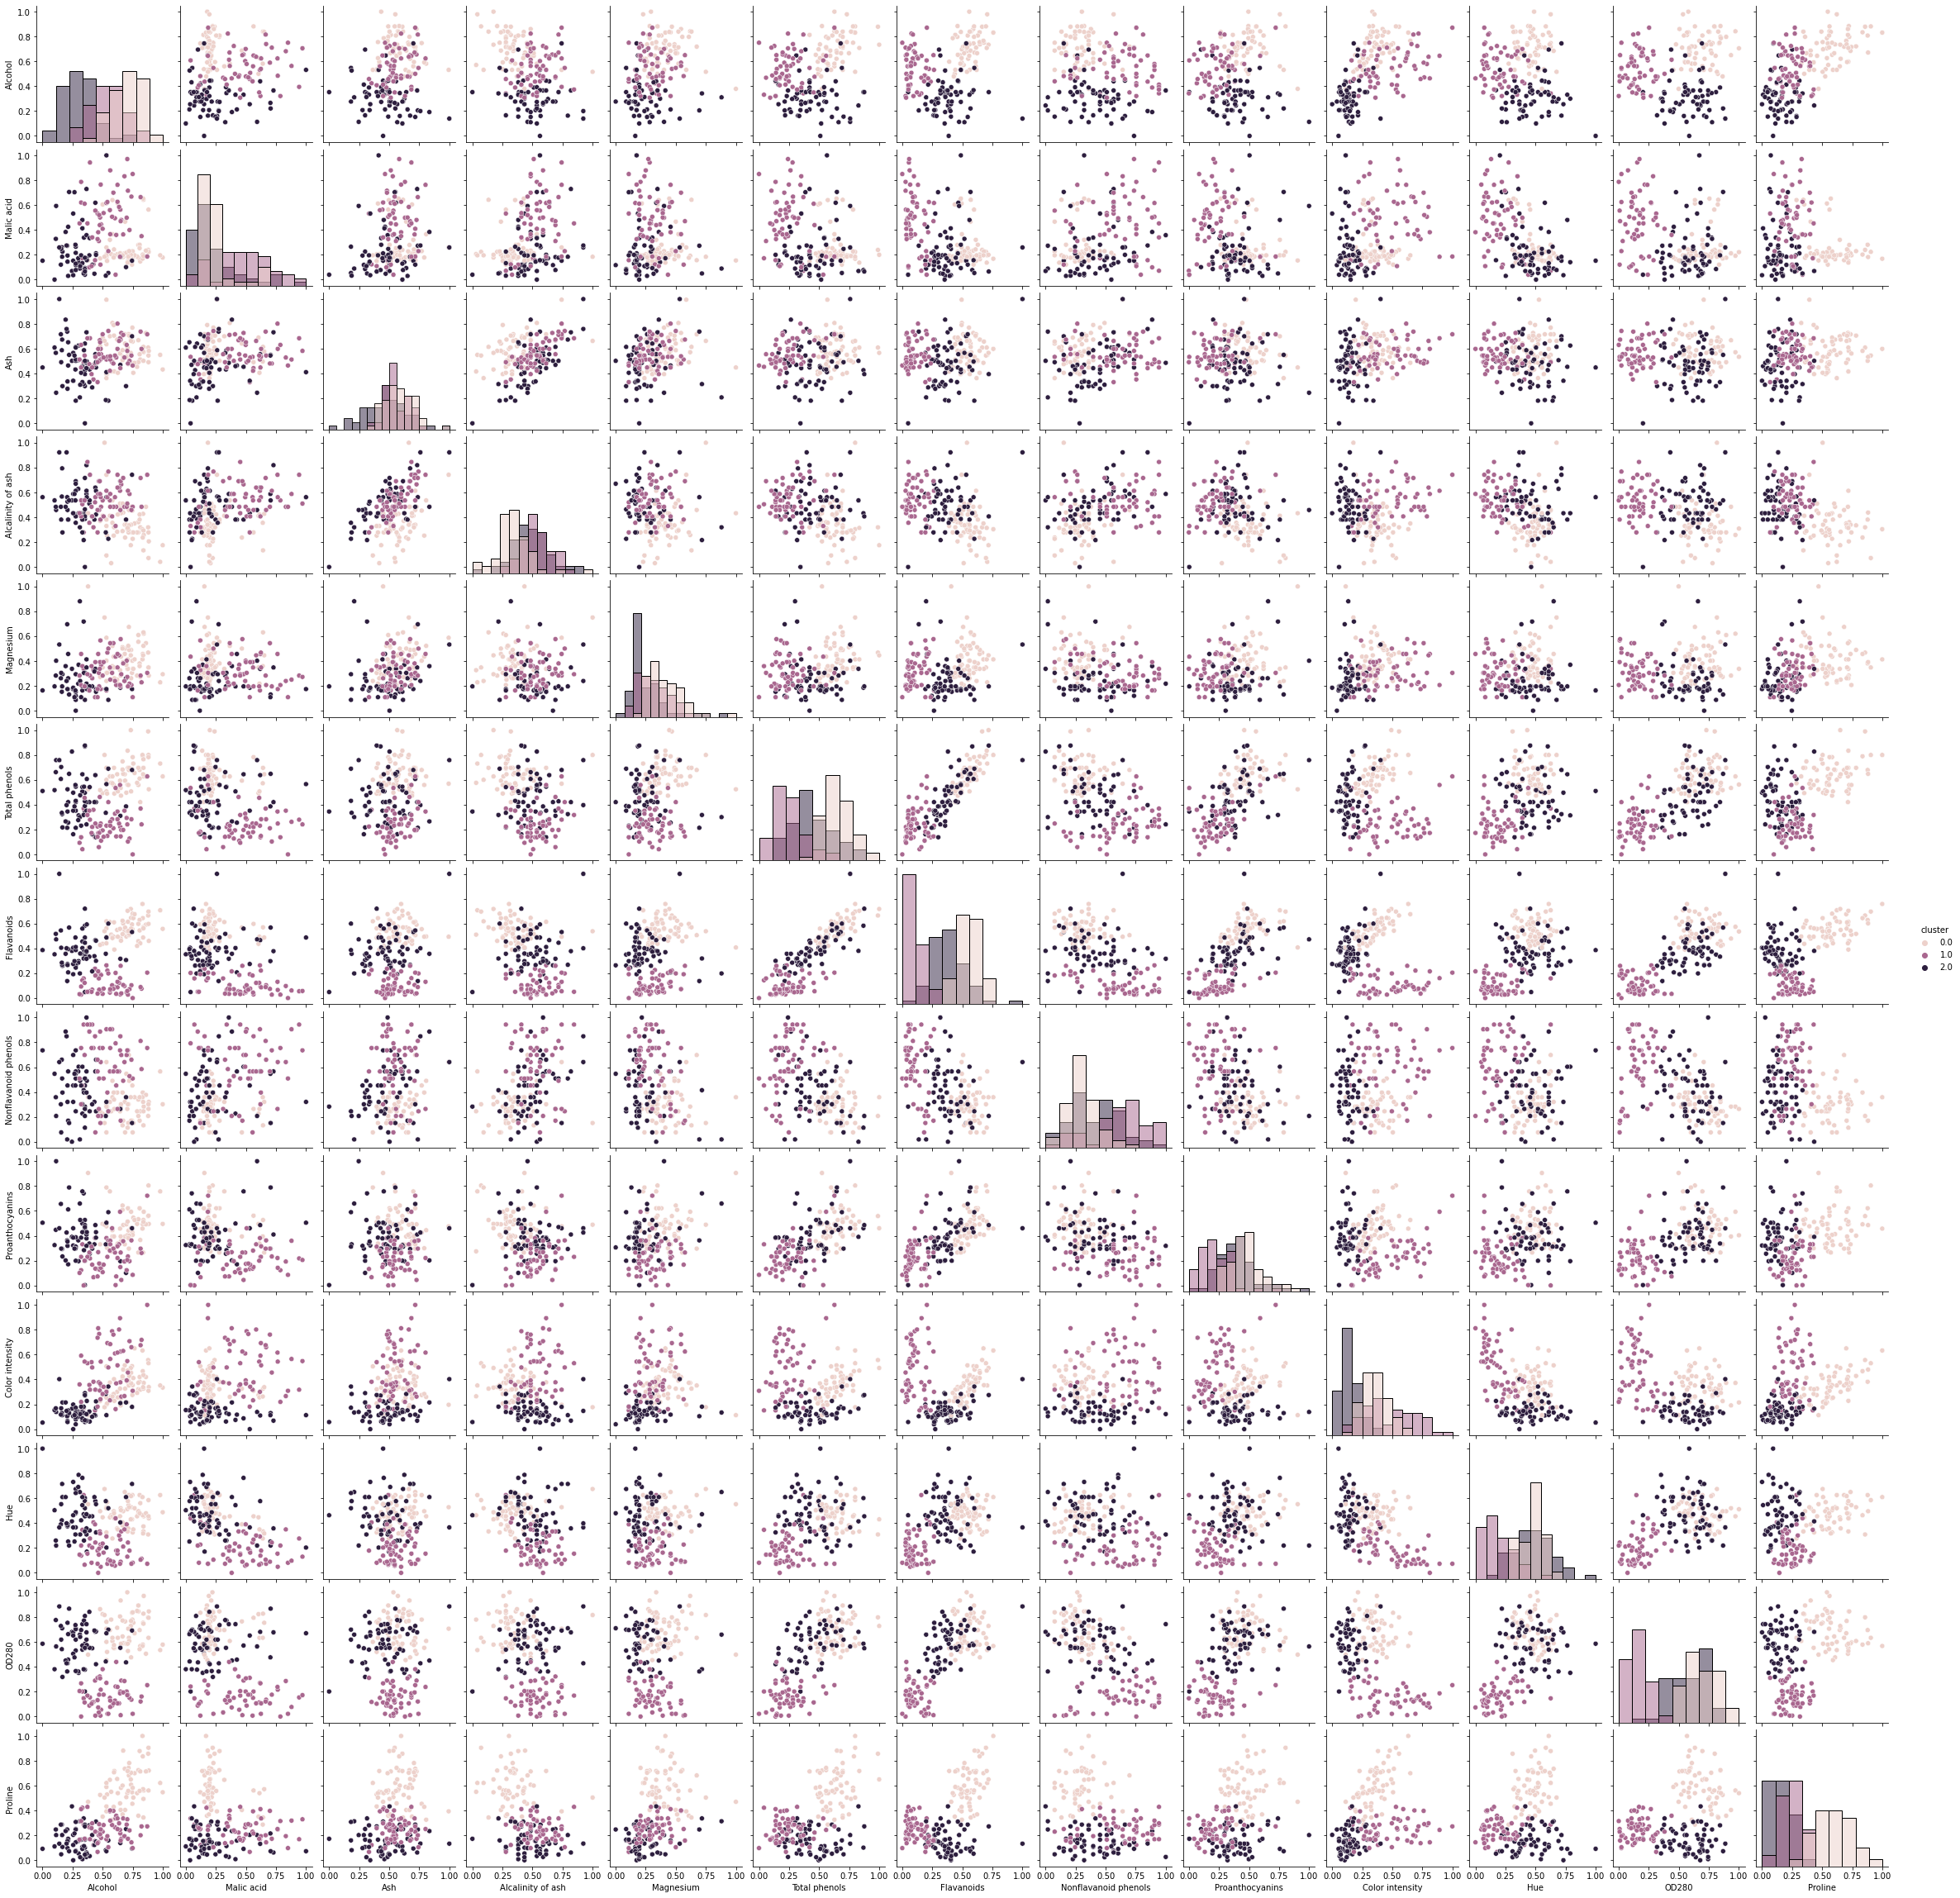

In [49]:
sns_plot = sns.pairplot(X_norm, hue = "cluster",diag_kind="hist")

In [68]:
#normalizing data using StandardScaler class
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [69]:
standardScaler.fit(df1);

In [70]:
X_scaled_array = standardScaler.transform(df1)

In [71]:
normalizedData = pd.DataFrame(X_scaled_array, columns = df1.columns)

In [72]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0)

In [73]:
res = kMeansClustering.fit_predict(normalizedData)

In [74]:
normalizedData["cluster"] = res.astype('float64')

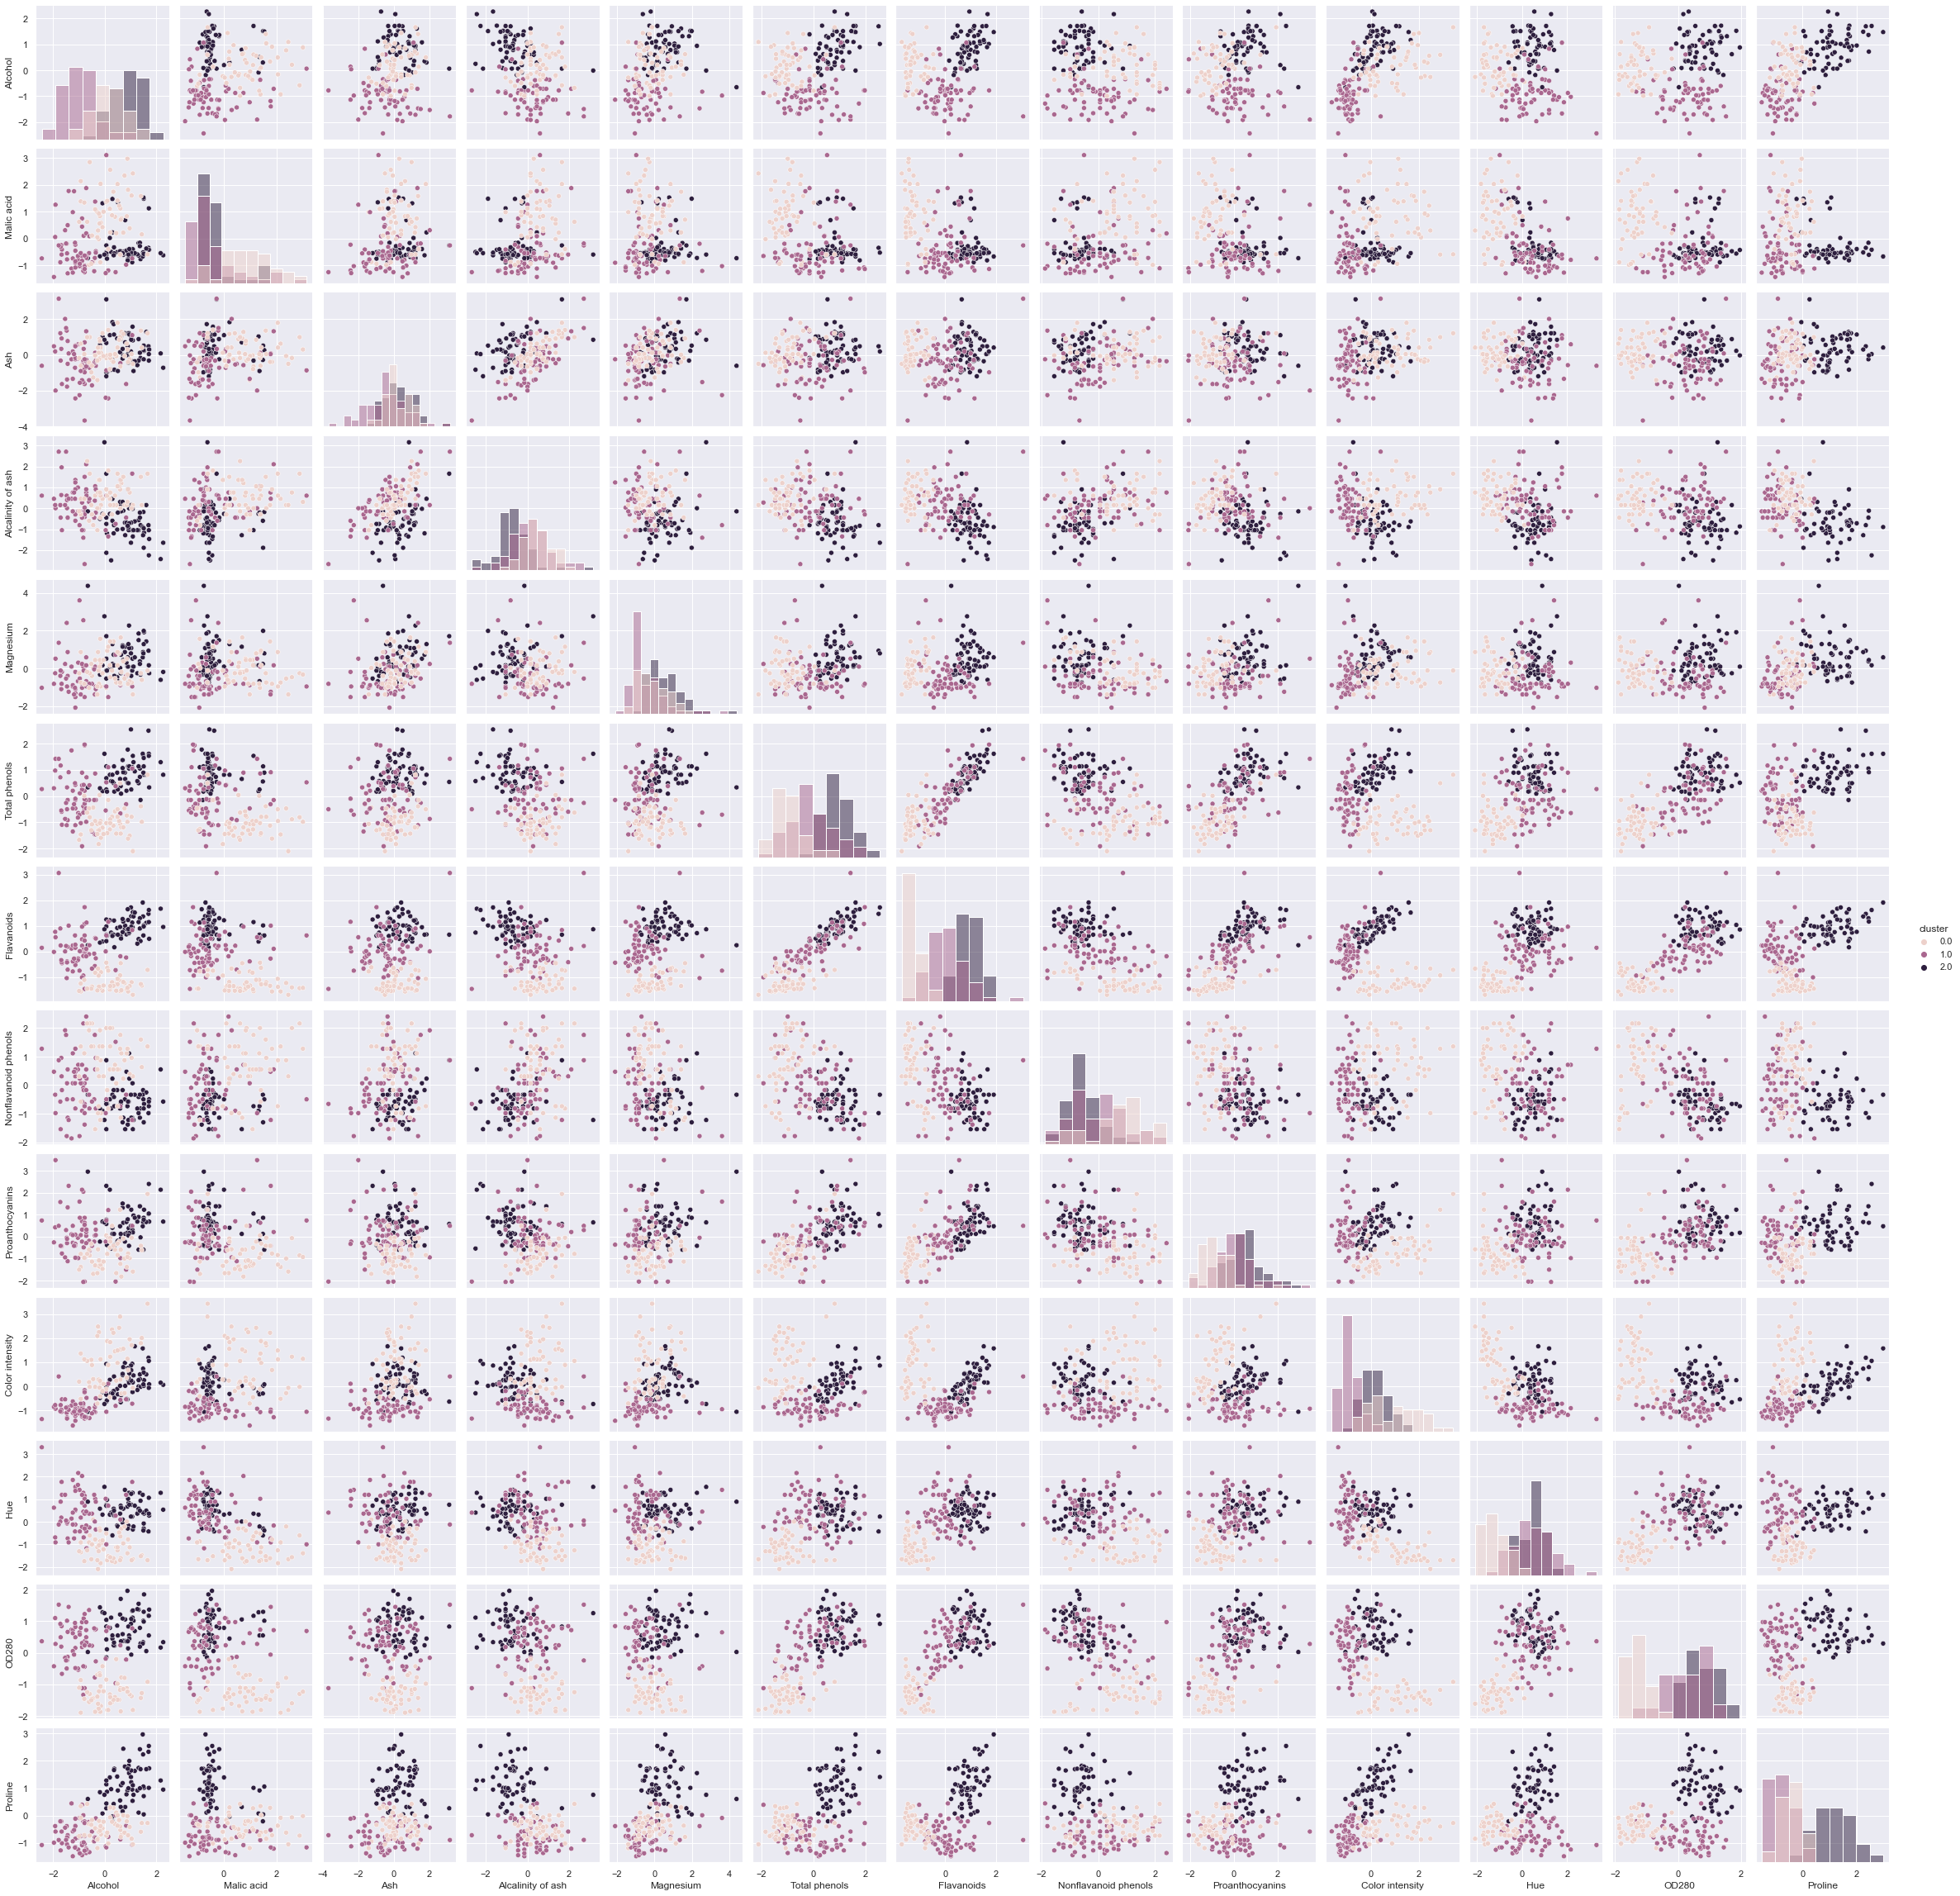

In [29]:
sns_plot = sns.pairplot(normalizedData, hue = "cluster",diag_kind="hist")

In [75]:
#PCA
pca = sklearnPCA(n_components=6)

In [78]:
#X_norm = (df1 - df1.min()) / (df1.max()-df1.min())#normalized data
standardScaler = StandardScaler()
standardScaler.fit(df1)
X_scaled_array = standardScaler.transform(df1)
normalizedData1 = pd.DataFrame(X_scaled_array, columns = df1.columns)
transformed = pd.DataFrame(pca.fit_transform(normalizedData1))

In [79]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
res = kMeansClustering.fit_predict(transformed)

In [80]:
transformed["cluster"] = res.astype('float64')

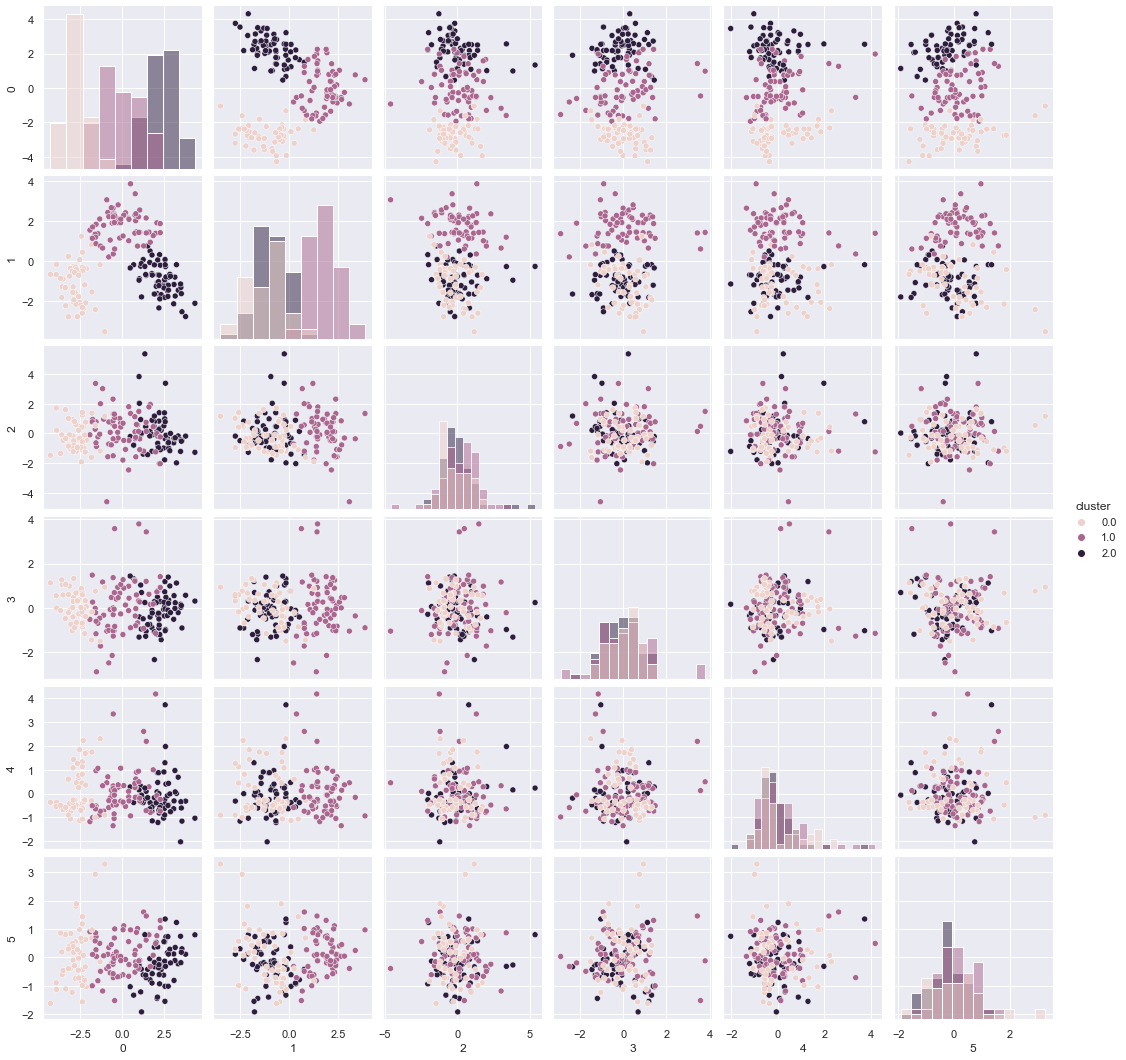

In [81]:
sns_plot = sns.pairplot(transformed, hue = "cluster",diag_kind="hist")

In [82]:
metrics.adjusted_rand_score(Label,transformed["cluster"] )

0.8974949815093207

In [67]:
print("rand_score without standarscaler:"+str(metrics.adjusted_rand_score(Label,X_norm["cluster"] )))

rand_score without standarscaler:0.8536602842727952


In [84]:
print("rand_score with standarscaler:"+str(metrics.adjusted_rand_score(Label,normalizedData["cluster"] )))

rand_score with standarscaler:0.9148795960669529


In [85]:
print("rand_score with standarscaler and pca:"+str(metrics.adjusted_rand_score(Label,transformed["cluster"] )))

rand_score with standarscaler:0.8974949815093207
